In [5]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
%matplotlib inline

# specify taxa, corruption, repetitions ranges of experiment: 
taxaMin = 6 
taxaMax = 11
taxaStep = 1

corruptionMin = 0.0
corruptionMax = 0.64
corruptionStep = 0.02

numRepetitions = 10

taxa = [x*taxaStep + taxaMin for x in range(int((taxaMax-taxaMin)/taxaStep)+1)]
corruption = [x*corruptionStep + corruptionMin for x in range(int((corruptionMax-corruptionMin)/corruptionStep)+2)]
repetitions = [x for x in range(0, 10)]

filenames = ["frac3/t"+str(x[0])+"_c"+str(round(x[1]*100))+"_"+str(x[2])+".frac.txt" for x in itertools.product(taxa, corruption, repetitions)]

def readFile(filename): 
    file = open(filename, 'r') 
    return [float(line.split('=')[1].strip()) for line in file]

def readTime(filename): 
    file = open(filename, 'r')
    return float(file.readline().strip())



In [ ]:
# creates a histogram for every repetition of every configuration
# each row shows shows the histograms of all repetitions for a single configuration 
# histogram titles follow the format "t11_c40_4", meaning 11 taxa, 40% corruption, repetition #4
# THIS WILL TAKE A WHILE TO RUN 

fig, axs = plt.subplots(204,10, figsize=(30,500))
axs = axs.ravel()

plt.figure()
for i, name in enumerate(filenames): 
    values = readFile(name)
    axs[i].hist(values, 50)
    axs[i].set_title(name.split("/")[1].split(".")[0])
    
    

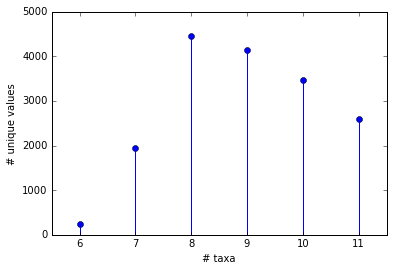

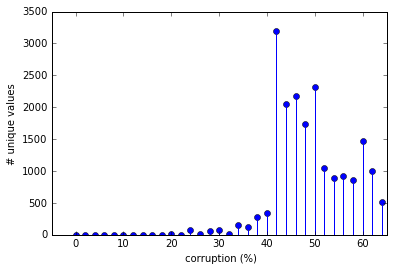

In [13]:
# see if there is a trend between #taxa vs unique values or %corruption vs unique values
valByTaxa = dict()
valByCorr = dict()

for name in filenames: 
    t = int(name.split("t")[1].split("_")[0])
    c = int(name.split("/")[1].split("c")[1].split("_")[0])
    values = readFile(name)
    valByTaxa.setdefault(t,[]).extend(values)
    valByCorr.setdefault(c,[]).extend(values)
    
uniqueByTaxa = dict()
uniqueByCorr = dict()

for key in valByTaxa.keys(): 
    uniqueByTaxa[key] = np.unique(np.array(valByTaxa.get(key)).round(decimals=4))
    
    
for key in valByCorr.keys():
    uniqueByCorr[key] = np.unique(np.array(valByCorr.get(key)).round(decimals=4))

# print(list(varByTaxa.keys()))
# print([varByTaxa.get(key) for key in varByTaxa.keys()])
plt.figure()
plt.stem(list(uniqueByTaxa.keys()), [uniqueByTaxa.get(key).shape[0] for key in uniqueByTaxa.keys()])
plt.axis([5.5, 11.5, 0, 5000])
plt.xlabel("# taxa")
plt.ylabel("# unique values")

plt.figure()
plt.stem(list(uniqueByCorr.keys()), [uniqueByCorr.get(key).shape[0] for key in uniqueByCorr.keys()])
plt.axis([-5, 65, 0, 3500])
plt.xlabel(" corruption (%)")
plt.ylabel("# unique values")


[5.5, 11.5, -0.1, 1.1]

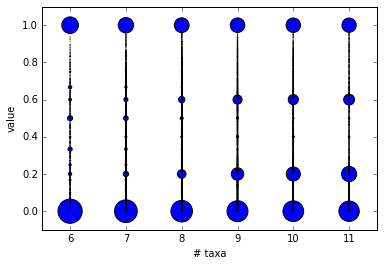

In [8]:

taxaList = [] 
entryList = []
sizeList = []
for key in uniqueByTaxa.keys(): 
    vals = uniqueByTaxa.get(key) 
    freqs = [list(np.array(valByTaxa.get(key)).round(decimals=4)).count(val)/(len(valByTaxa.get(key))) * 1000.0 for val in vals]
    
    taxa_ = [key for x in range(len(vals))]
    taxaList.extend(taxa_)
    entryList.extend(vals)
    sizeList.extend(freqs)
    
plt.figure()
plt.scatter(taxaList, entryList, s=sizeList)
plt.xlabel("# taxa") 
plt.ylabel("value")
plt.axis([5.5, 11.5, -0.1, 1.1])
    

[-5, 70, -0.1, 1.1]

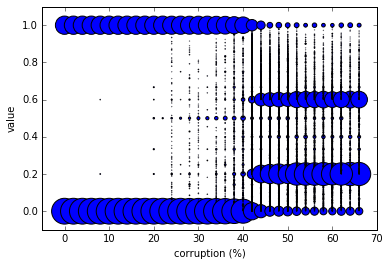

In [17]:

corrList = [] 
entryList = []
sizeList = []
for key in uniqueByCorr.keys(): 
    vals = uniqueByCorr.get(key) 
    freqs = [list(np.array(valByCorr.get(key)).round(decimals=4)).count(val)/(len(valByCorr.get(key))) * 1000.0  for val in vals]
    
    corr_ = [key for x in range(len(vals))]
    corrList.extend(corr_)
    entryList.extend(vals)
    sizeList.extend(freqs)
    
plt.figure()
plt.scatter(corrList, entryList, s=sizeList)
plt.xlabel("corruption (%)") 
plt.ylabel("value")
plt.axis([-5, 70, -0.1, 1.1])
    

[-3, 70, -0.1, 1.5]

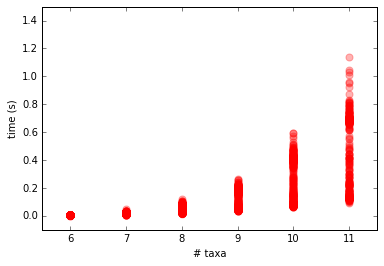

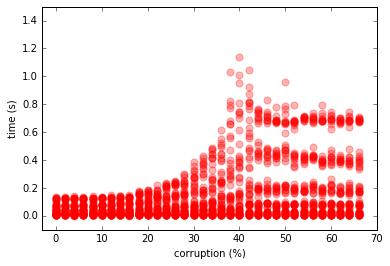

In [15]:
# time 
# plot mean and variance in one thingy 

times = []
taxaList = []
corrList = []
for name in filenames: 
    times.append(readTime(name.split(".")[0]+".dur.txt"))
    taxaList.append(int(name.split("t")[1].split("_")[0]))
    corrList.append(int(name.split("/")[1].split("c")[1].split("_")[0]))

    
plt.figure()
plt.scatter(taxaList, times, alpha=0.3, color='r', s=50)
plt.xlabel("# taxa")
plt.ylabel("time (s)")
plt.axis([5.5, 11.5, -0.1, 1.5])

plt.figure()
plt.scatter(corrList, times, alpha=0.3, color='r', s=50)
plt.xlabel("corruption (%)")
plt.ylabel("time (s)")
plt.axis([-3, 70, -0.1, 1.5])


# plt.figure()
# plt.plot(taxaList, np.mean())

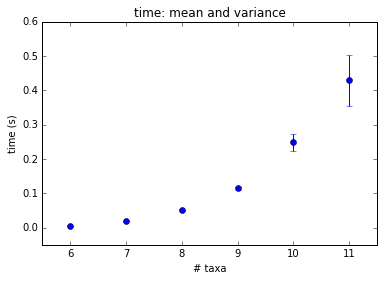

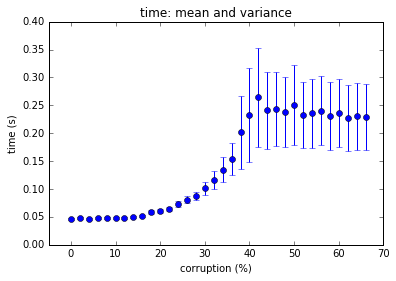

In [16]:
timeByTaxa = dict()
timeByCorr = dict() 

for i, time in enumerate(times):     
    timeByTaxa.setdefault(taxaList[i],[]).append(time)
    timeByCorr.setdefault(corrList[i],[]).append(time)
  
plt.figure()
plt.errorbar(list(timeByTaxa.keys()), [np.mean(timeByTaxa.get(key)) for key in timeByTaxa.keys()], [np.var(timeByTaxa.get(key)) for key in timeByTaxa.keys()], linestyle='None', marker='o')
plt.axis([5.5, 11.5, -0.05, 0.6])
plt.xlabel("# taxa")
plt.ylabel("time (s)")
plt.title("time: mean and variance")

plt.figure()
plt.errorbar(list(timeByCorr.keys()), [np.mean(timeByCorr.get(key)) for key in timeByCorr.keys()], [np.var(timeByCorr.get(key)) for key in timeByCorr.keys()], linestyle='None', marker='o')
plt.axis([-5, 70, 0, 0.4])
plt.xlabel("corruption (%)")
plt.ylabel("time (s)")
plt.title("time: mean and variance")

[-10, 500, -0.05, 1.5]

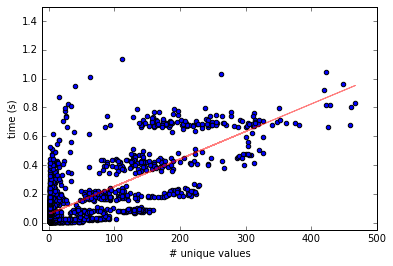

In [12]:
numUnique = []
times = []

for name in filenames: 
    data = readFile(name)
    unique = np.unique(np.array(data)).round(decimals=4)
    numUnique.append(len(unique))
    time = readTime(name.split(".")[0]+".dur.txt")
    times.append(time)
    
plt.figure()
fit = np.polyfit(numUnique, times, deg=1)
line = fit[0] * np.array(numUnique) + fit[1]
plt.plot(numUnique, line, color='red', alpha=0.5)
plt.scatter(numUnique, times)
plt.xlabel("# unique values")
plt.ylabel("time (s)")
plt.axis([-10, 500, -0.05, 1.5])